### 1. **Data Loading and Preprocessing**
   - **Data Loading**: The dataset is loaded from a CSV file.
   - **Feature Selection**: Unnecessary columns are removed, retaining only relevant features.
   - **Train-Test Split**: Data is split into training, evaluation, and test sets using `train_test_split`, ensuring a stratified distribution of classes.

### 2. **Data Balancing Techniques**
   - Different balancing methods are applied to handle class imbalance:
     - **SMOTE**: Oversamples the minority class by creating synthetic samples.
     - **SMOTE + ENN**: Combines SMOTE with Edited Nearest Neighbors (ENN) to oversample and clean the data.
     - **Random Under Sampling (RUS)**: Balances the data by undersampling the majority class.

### 3. **Machine Learning Models**
   - **Logistic Regression**: A simple linear model for binary classification, with class balancing enabled.
   - **Decision Tree**: A non-linear classifier that splits the data into branches based on feature importance.
   - **Random Forest**: An ensemble model using multiple decision trees to improve accuracy and reduce overfitting.
   - **XGBoost**: A gradient boosting algorithm that builds trees sequentially, optimizing for log-loss and improving model accuracy.
   - **Evaluation Metrics**: For each model, accuracy, F1 score (weighted), confusion matrix, and classification report are computed and printed.

### 4. **Evaluation and Visualization**
   - **Confusion Matrix**: Confusion matrices are plotted for each model to assess true vs. false positives and negatives.
   - **ROC and Precision-Recall Curves**: 
     - **ROC Curve**: The curve is plotted to show the trade-off between True Positive Rate (TPR) and False Positive Rate (FPR), with the Area Under Curve (AUC) calculated to quantify model performance.
     - **Precision-Recall Curve**: This curve is plotted to highlight the trade-off between precision and recall, especially useful in class-imbalanced datasets.

### 5. **Feature Importance**
   - **Feature Importance Visualization**: For `Decision Tree` and `Random Forest` models, the top 10 features are visualized to highlight which features contribute most to predictions.

### Part 1: SMOTE


--- Logistic Regression Model ---
Logistic Regression Accuracy: 0.6803
Logistic Regression F1 Score (Weighted): 0.7521
Confusion Matrix:
[[3673 1749]
 [ 140  346]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.68      0.80      5422
           1       0.17      0.71      0.27       486

    accuracy                           0.68      5908
   macro avg       0.56      0.69      0.53      5908
weighted avg       0.90      0.68      0.75      5908



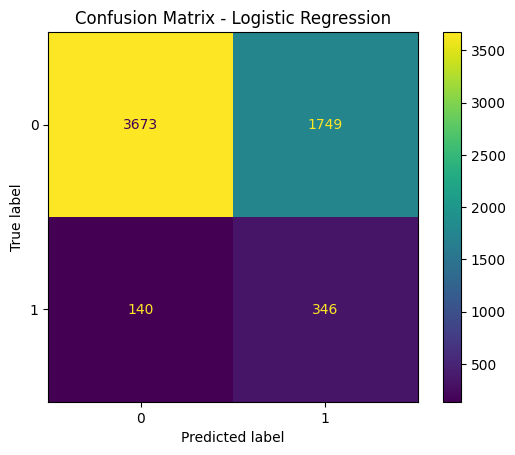

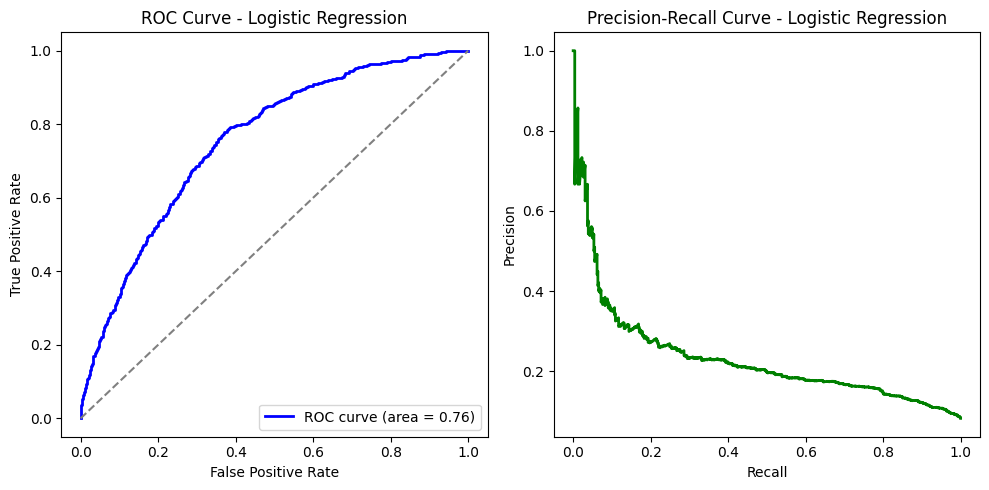

C:\Users\pangwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
3 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pangwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pangwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

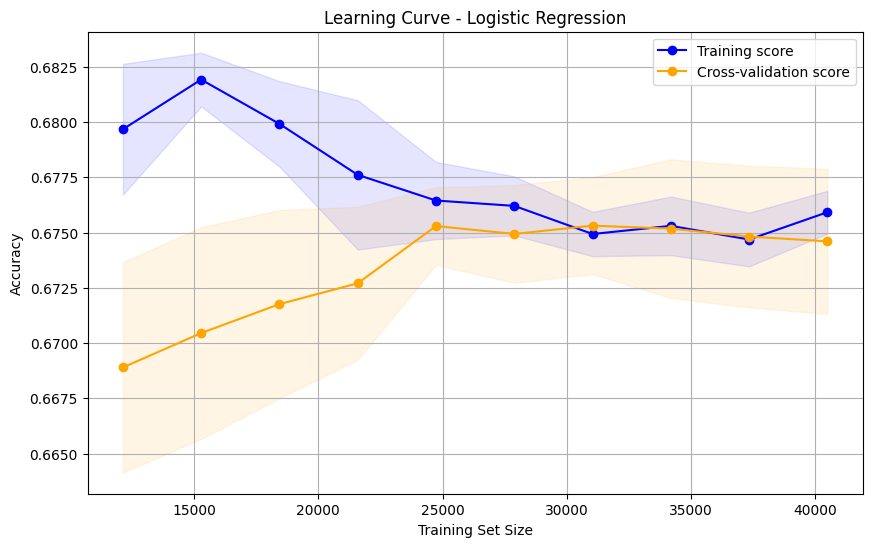

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE  # SMOTE for oversampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold

# Load the dataset
data = pd.read_csv('final_dataset_preprocessed.csv')

# Define features and target
# Remove irrelevant columns, such as IDs, 'deathtime', etc.
# features = data.drop(columns=['hadm_id', 'stay_id', 'subject_id', 'deathtime', 'label', 'gender', 'intime', 'outtime'])
features = data.drop(columns=['label', 'gender_numeric'])
target = data['label']

# Data split: Training, Validation, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

# Use SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)


# Logistic Regression Model
print("\n--- Logistic Regression Model ---")
logistic_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
logistic_model.fit(X_train_balanced, y_train_balanced)
y_pred_logistic = logistic_model.predict(X_eval)

# Evaluate Logistic Regression Model
accuracy_logistic = accuracy_score(y_eval, y_pred_logistic)
f1_logistic = f1_score(y_eval, y_pred_logistic, average='weighted')
confusion_logistic = confusion_matrix(y_eval, y_pred_logistic)
logistic_report = classification_report(y_eval, y_pred_logistic)

print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Logistic Regression F1 Score (Weighted): {f1_logistic:.4f}")
print("Confusion Matrix:")
print(confusion_logistic)
print("\nClassification Report:")
print(logistic_report)

# Visualize the confusion matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_eval, y_pred_logistic)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Compute predicted probabilities for Logistic Regression
y_prob_logistic = logistic_model.predict_proba(X_eval)[:, 1]

# ROC Curve and AUC for Logistic Regression
fpr_logistic, tpr_logistic, _ = roc_curve(y_eval, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_logistic:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")

# Precision-Recall Curve for Logistic Regression
precision, recall, _ = precision_recall_curve(y_eval, y_prob_logistic)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression')

plt.tight_layout()
plt.show()


def plot_learning_curve(estimator, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)):
    # Get learning curve data with stratified k-fold cross-validation
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1, error_score=np.nan
    )
    
    # Calculate mean and standard deviation for training and validation scores, ignoring NaN values
    train_scores_mean = np.nanmean(train_scores, axis=1)
    train_scores_std = np.nanstd(train_scores, axis=1)
    valid_scores_mean = np.nanmean(valid_scores, axis=1)
    valid_scores_std = np.nanstd(valid_scores, axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='orange', label='Cross-validation score')
    
    # Fill the area between the mean ± std for training and validation scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')
    
    plt.title('Learning Curve - Logistic Regression')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot the learning curve for Logistic Regression with Stratified KFold
plot_learning_curve(logistic_model, X_train_balanced, y_train_balanced, cv=StratifiedKFold(n_splits=5), scoring='accuracy')




--- Decision Tree Model ---
Decision Tree Accuracy: 0.8307
Decision Tree F1 Score (Weighted): 0.8460
Confusion Matrix:
[[4798  624]
 [ 376  110]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.91      5422
           1       0.15      0.23      0.18       486

    accuracy                           0.83      5908
   macro avg       0.54      0.56      0.54      5908
weighted avg       0.86      0.83      0.85      5908



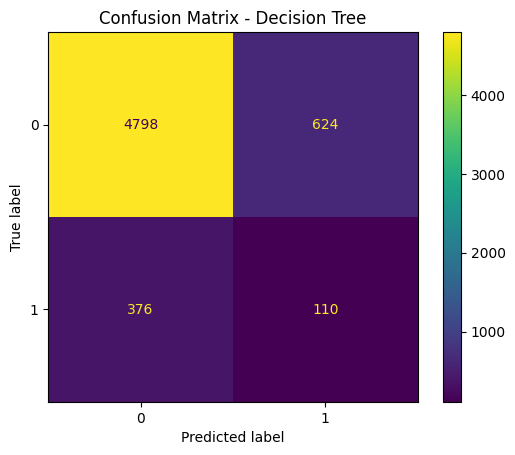

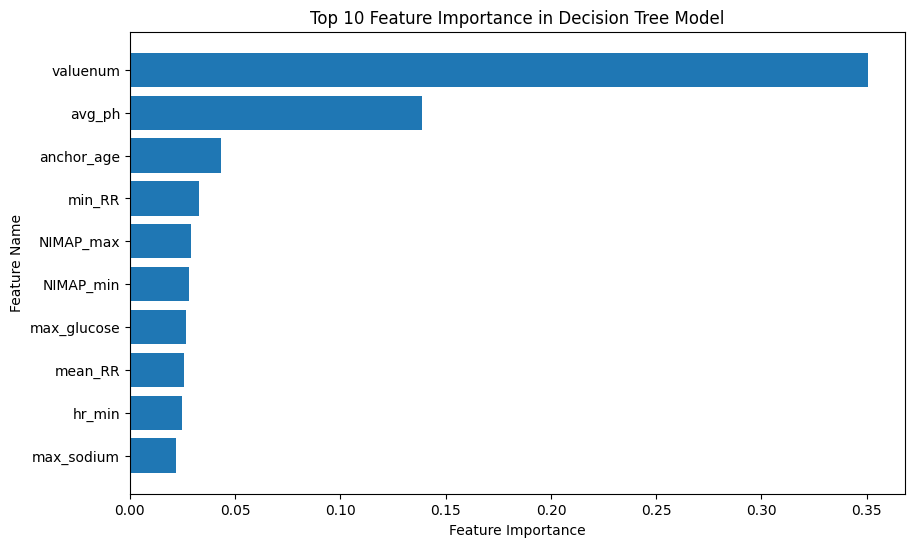

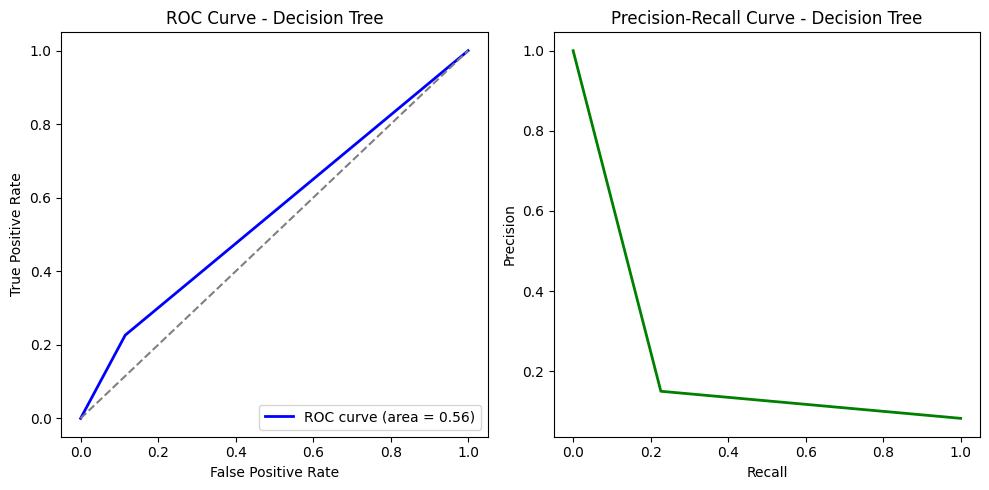

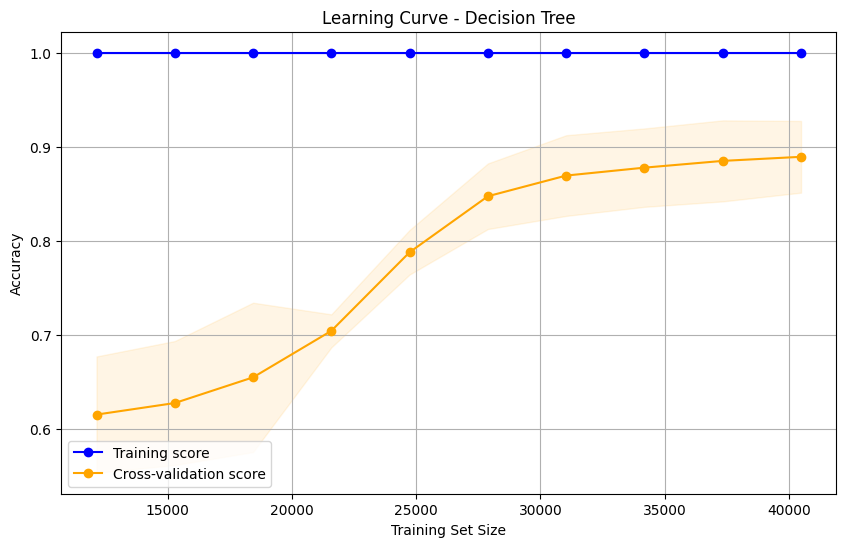

In [7]:
# Decision Tree Model
print("\n--- Decision Tree Model ---")
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = decision_tree_model.predict(X_eval)

# Evaluate Decision Tree Model
accuracy_dt = accuracy_score(y_eval, y_pred_dt)
f1_dt = f1_score(y_eval, y_pred_dt, average='weighted')
confusion_dt = confusion_matrix(y_eval, y_pred_dt)
dt_report = classification_report(y_eval, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree F1 Score (Weighted): {f1_dt:.4f}")
print("Confusion Matrix:")
print(confusion_dt)
print("\nClassification Report:")
print(dt_report)

# Visualize the confusion matrix for Decision Tree
ConfusionMatrixDisplay.from_predictions(y_eval, y_pred_dt)
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Visualize Top 10 Feature Importance in Decision Tree
feature_names = list(features.columns)
decision_tree_importances = decision_tree_model.feature_importances_
sorted_indices_dt = np.argsort(decision_tree_importances)[::-1][:10]
sorted_feature_names_dt = np.array(feature_names)[sorted_indices_dt]
sorted_importances_dt = decision_tree_importances[sorted_indices_dt]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances_dt)), sorted_importances_dt, align='center')
plt.yticks(range(len(sorted_importances_dt)), sorted_feature_names_dt)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Feature Importance in Decision Tree Model")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

# Compute predicted probabilities for Decision Tree
y_prob_dt = decision_tree_model.predict_proba(X_eval)[:, 1]

# ROC Curve and AUC for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_eval, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")

# Precision-Recall Curve for Decision Tree
precision_dt, recall_dt, _ = precision_recall_curve(y_eval, y_prob_dt)
plt.subplot(1, 2, 2)
plt.plot(recall_dt, precision_dt, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Decision Tree')

plt.tight_layout()
plt.show()

def plot_learning_curve(estimator, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)):
    # Get learning curve data with stratified k-fold cross-validation
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1, error_score=np.nan
    )
    
    # Calculate mean and standard deviation for training and validation scores, ignoring NaN values
    train_scores_mean = np.nanmean(train_scores, axis=1)
    train_scores_std = np.nanstd(train_scores, axis=1)
    valid_scores_mean = np.nanmean(valid_scores, axis=1)
    valid_scores_std = np.nanstd(valid_scores, axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='orange', label='Cross-validation score')
    
    # Fill the area between the mean ± std for training and validation scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')
    
    plt.title('Learning Curve - Decision Tree')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot the learning curve for Decision Tree
plot_learning_curve(decision_tree_model, X_train_balanced, y_train_balanced, cv=StratifiedKFold(n_splits=5), scoring='accuracy')


--- Random Forest Model ---
Random Forest Accuracy: 0.8962
Random Forest F1 Score (Weighted): 0.8799
Confusion Matrix:
[[5238  184]
 [ 429   57]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      5422
           1       0.24      0.12      0.16       486

    accuracy                           0.90      5908
   macro avg       0.58      0.54      0.55      5908
weighted avg       0.87      0.90      0.88      5908



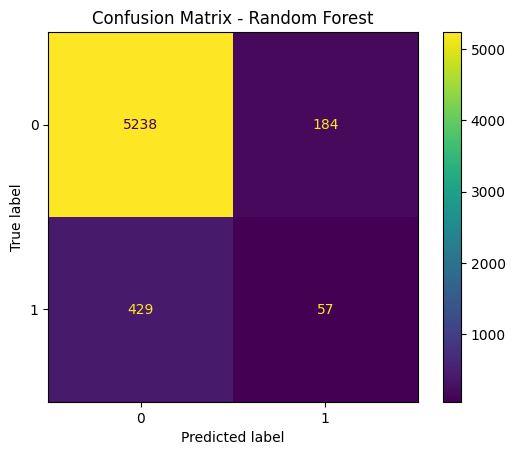

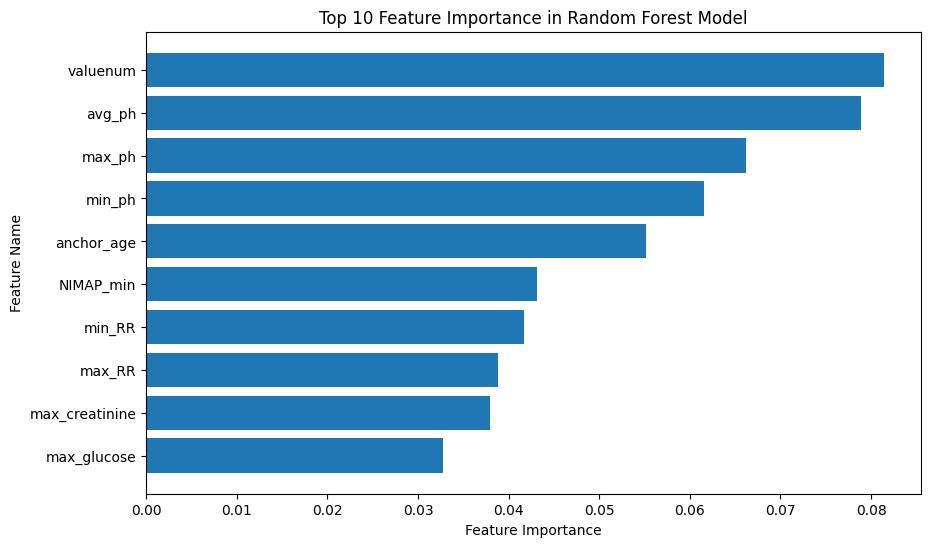

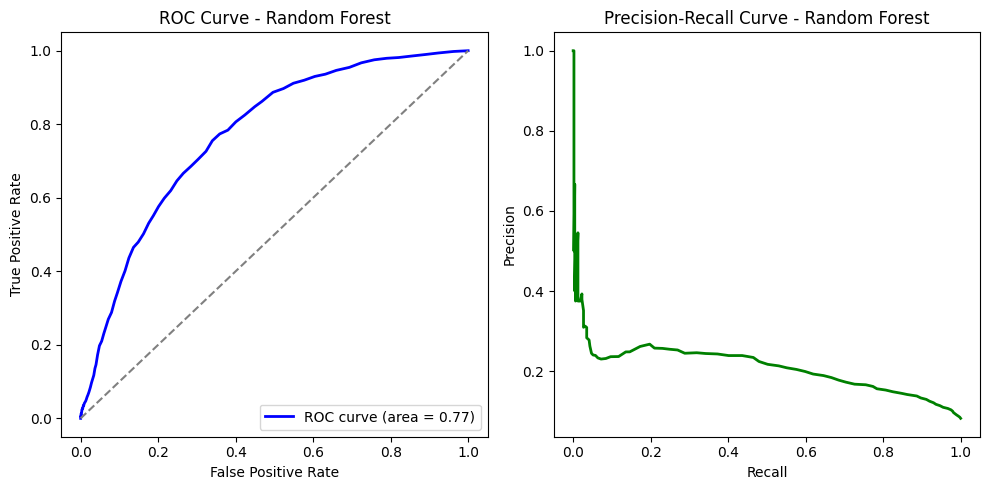

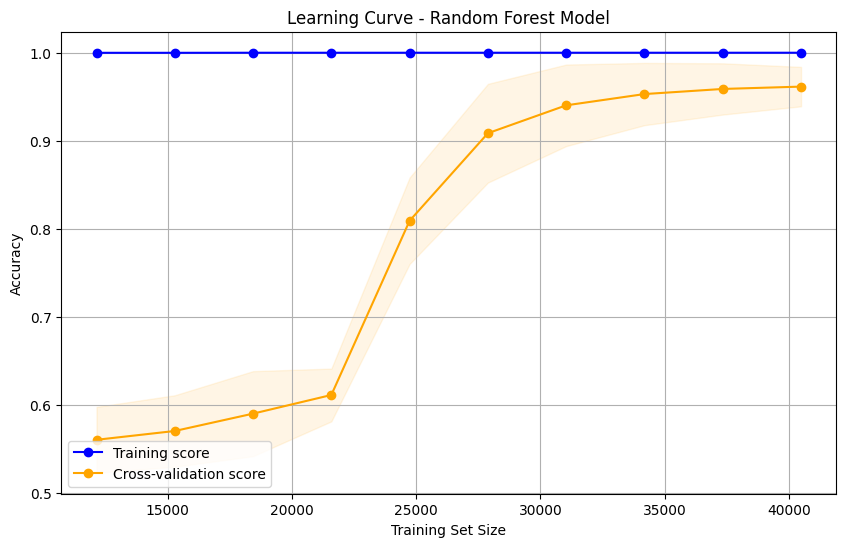

In [8]:
# Random Forest Model
print("\n--- Random Forest Model ---")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = random_forest_model.predict(X_eval)

# Evaluate Random Forest Model
accuracy_rf = accuracy_score(y_eval, y_pred_rf)
f1_rf = f1_score(y_eval, y_pred_rf, average='weighted')
confusion_rf = confusion_matrix(y_eval, y_pred_rf)
rf_report = classification_report(y_eval, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score (Weighted): {f1_rf:.4f}")
print("Confusion Matrix:")
print(confusion_rf)
print("\nClassification Report:")
print(rf_report)

# Visualize the confusion matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_eval, y_pred_rf)
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Visualize Top 10 Feature Importance in Random Forest
random_forest_importances = random_forest_model.feature_importances_
sorted_indices_rf = np.argsort(random_forest_importances)[::-1][:10]
sorted_feature_names_rf = np.array(feature_names)[sorted_indices_rf]
sorted_importances_rf = random_forest_importances[sorted_indices_rf]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances_rf)), sorted_importances_rf, align='center')
plt.yticks(range(len(sorted_importances_rf)), sorted_feature_names_rf)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance on top
plt.show()

# Compute predicted probabilities for Random Forest
y_prob_rf = random_forest_model.predict_proba(X_eval)[:, 1]

# ROC Curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_eval, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")

# Precision-Recall Curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_eval, y_prob_rf)
plt.subplot(1, 2, 2)
plt.plot(recall_rf, precision_rf, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest')

plt.tight_layout()
plt.show()

def plot_learning_curve(estimator, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)):
    # Get learning curve data with stratified k-fold cross-validation
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1, error_score=np.nan
    )
    
    # Calculate mean and standard deviation for training and validation scores, ignoring NaN values
    train_scores_mean = np.nanmean(train_scores, axis=1)
    train_scores_std = np.nanstd(train_scores, axis=1)
    valid_scores_mean = np.nanmean(valid_scores, axis=1)
    valid_scores_std = np.nanstd(valid_scores, axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='orange', label='Cross-validation score')
    
    # Fill the area between the mean ± std for training and validation scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')
    
    plt.title('Learning Curve - Random Forest Model')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()
# Plot the learning curve for RF
plot_learning_curve(random_forest_model, X_train_balanced, y_train_balanced, cv=StratifiedKFold(n_splits=5), scoring='accuracy')


--- XGBoost Model ---
XGBoost Accuracy: 0.9154
XGBoost F1 Score (Weighted): 0.8903
Confusion Matrix:
[[5359   63]
 [ 437   49]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96      5422
           1       0.44      0.10      0.16       486

    accuracy                           0.92      5908
   macro avg       0.68      0.54      0.56      5908
weighted avg       0.88      0.92      0.89      5908



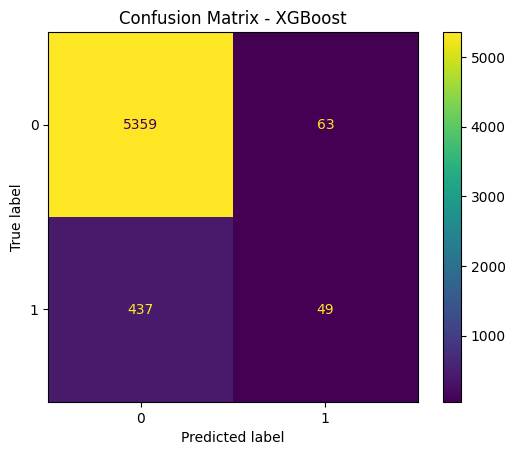

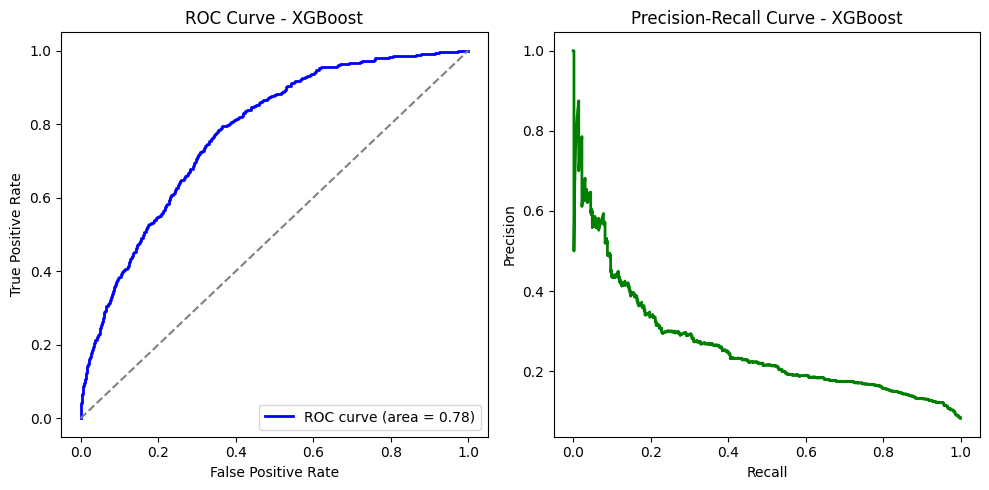

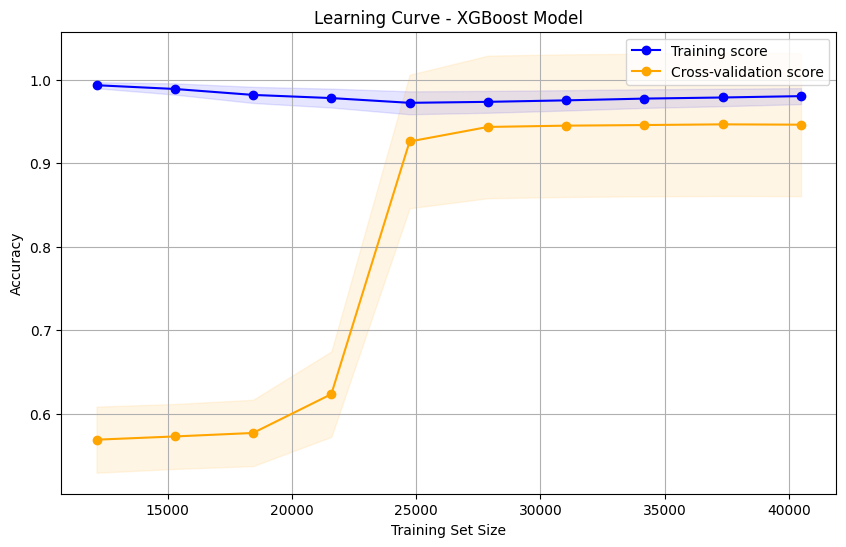

In [9]:
# XGBoost Model
print("\n--- XGBoost Model ---")
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgboost = xgboost_model.predict(X_eval)

# Evaluate XGBoost Model
accuracy_xgboost = accuracy_score(y_eval, y_pred_xgboost)
f1_xgboost = f1_score(y_eval, y_pred_xgboost, average='weighted')
confusion_xgboost = confusion_matrix(y_eval, y_pred_xgboost)
xgboost_report = classification_report(y_eval, y_pred_xgboost)

print(f"XGBoost Accuracy: {accuracy_xgboost:.4f}")
print(f"XGBoost F1 Score (Weighted): {f1_xgboost:.4f}")
print("Confusion Matrix:")
print(confusion_xgboost)
print("\nClassification Report:")
print(xgboost_report)

# Visualize the confusion matrix for XGBoost
ConfusionMatrixDisplay.from_predictions(y_eval, y_pred_xgboost)
plt.title("Confusion Matrix - XGBoost")
plt.show()

# Compute predicted probabilities for XGBoost
y_prob_xgb = xgboost_model.predict_proba(X_eval)[:, 1]

# ROC Curve and AUC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_eval, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")

# Precision-Recall Curve for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_eval, y_prob_xgb)
plt.subplot(1, 2, 2)
plt.plot(recall_xgb, precision_xgb, color='green', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - XGBoost')

plt.tight_layout()
plt.show()

def plot_learning_curve(estimator, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)):
    # Get learning curve data with stratified k-fold cross-validation
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring=scoring, n_jobs=-1, error_score=np.nan
    )
    
    # Calculate mean and standard deviation for training and validation scores, ignoring NaN values
    train_scores_mean = np.nanmean(train_scores, axis=1)
    train_scores_std = np.nanstd(train_scores, axis=1)
    valid_scores_mean = np.nanmean(valid_scores, axis=1)
    valid_scores_std = np.nanstd(valid_scores, axis=1)
    
    # Plot the learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='orange', label='Cross-validation score')
    
    # Fill the area between the mean ± std for training and validation scores
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')
    
    plt.title('Learning Curve - XGBoost Model')
    plt.xlabel('Training Set Size')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()
# Plot the learning curve for XGBoost
plot_learning_curve(xgboost_model, X_train_balanced, y_train_balanced, cv=StratifiedKFold(n_splits=5), scoring='accuracy')

FINAL COMPARISION WITH SAME TEST AND TRAIN FILE


--- Logistic Regression Model ---
Logistic Regression Recall (Weighted): 0.6810
Logistic Regression F1 Score (Weighted): 0.6810
Confusion Matrix:
[[687 313]
 [325 675]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.69      0.68      1000
           1       0.68      0.68      0.68      1000

    accuracy                           0.68      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.68      0.68      0.68      2000



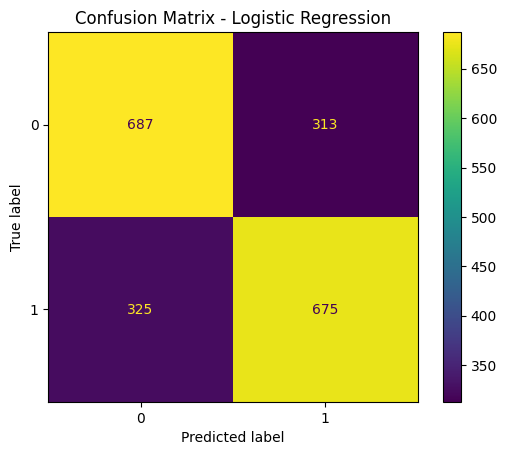

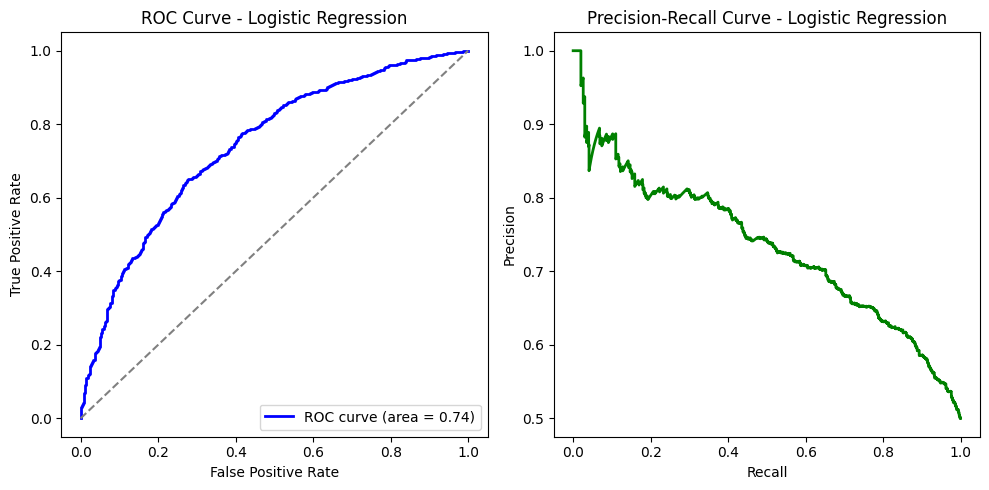


--- Decision Tree Model ---
Decision Tree Recall (Weighted): 0.6020
Decision Tree F1 Score (Weighted): 0.5816
Confusion Matrix:
[[823 177]
 [619 381]]

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.82      0.67      1000
           1       0.68      0.38      0.49      1000

    accuracy                           0.60      2000
   macro avg       0.63      0.60      0.58      2000
weighted avg       0.63      0.60      0.58      2000



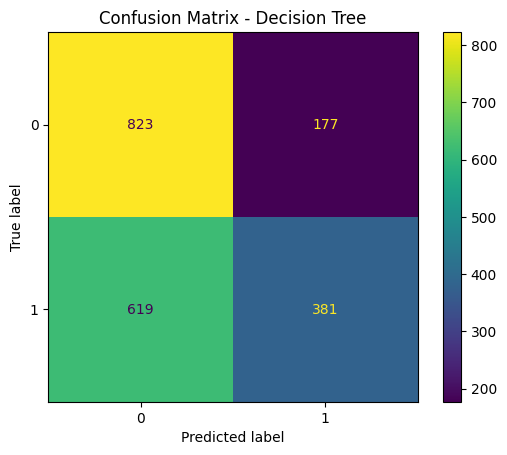

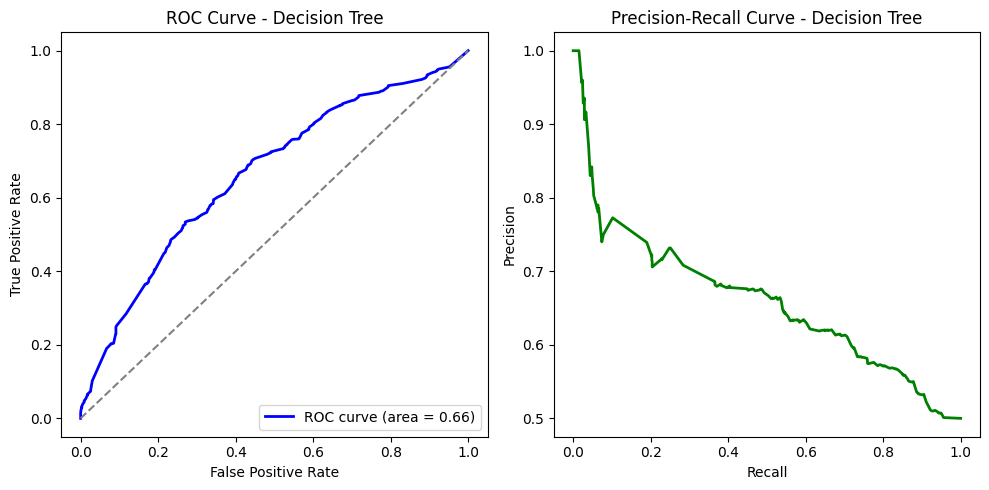


--- Random Forest Model ---
Random Forest Recall (Weighted): 0.6550
Random Forest F1 Score (Weighted): 0.6341
Confusion Matrix:
[[894 106]
 [584 416]]

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.89      0.72      1000
           1       0.80      0.42      0.55      1000

    accuracy                           0.66      2000
   macro avg       0.70      0.66      0.63      2000
weighted avg       0.70      0.66      0.63      2000



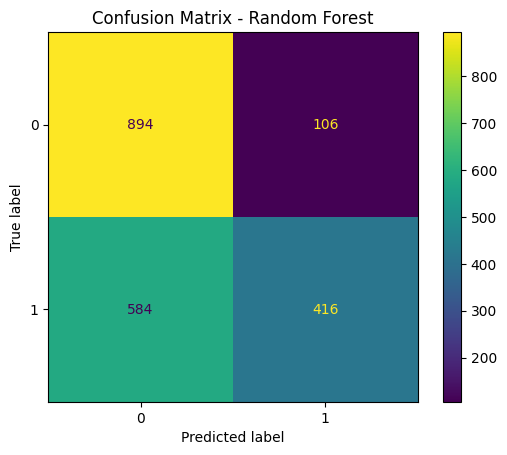

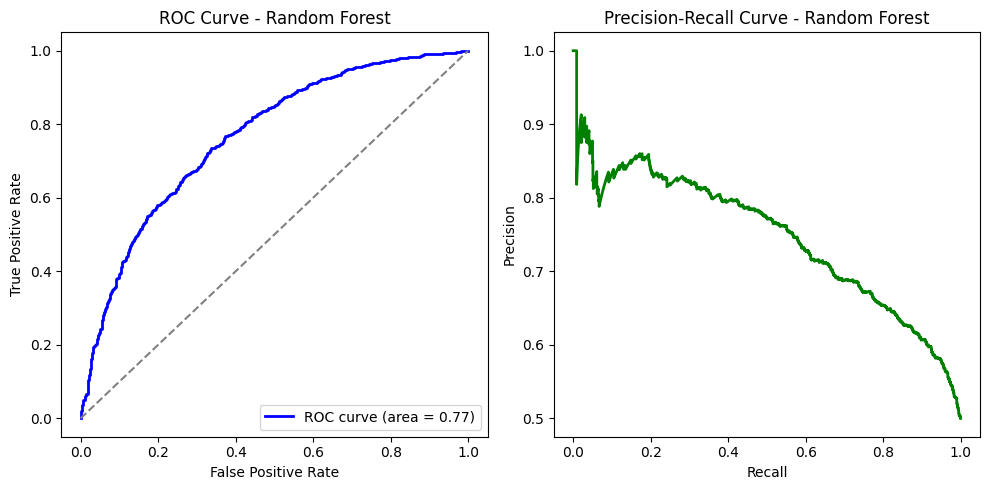


--- XGBoost Model ---
XGBoost Recall (Weighted): 0.6665
XGBoost F1 Score (Weighted): 0.6519
Confusion Matrix:
[[462 538]
 [129 871]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.46      0.58      1000
           1       0.62      0.87      0.72      1000

    accuracy                           0.67      2000
   macro avg       0.70      0.67      0.65      2000
weighted avg       0.70      0.67      0.65      2000



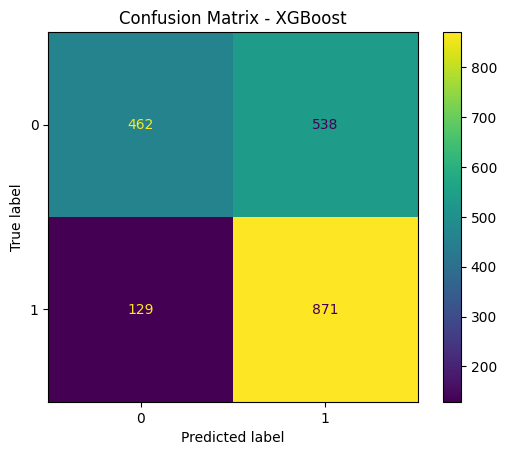

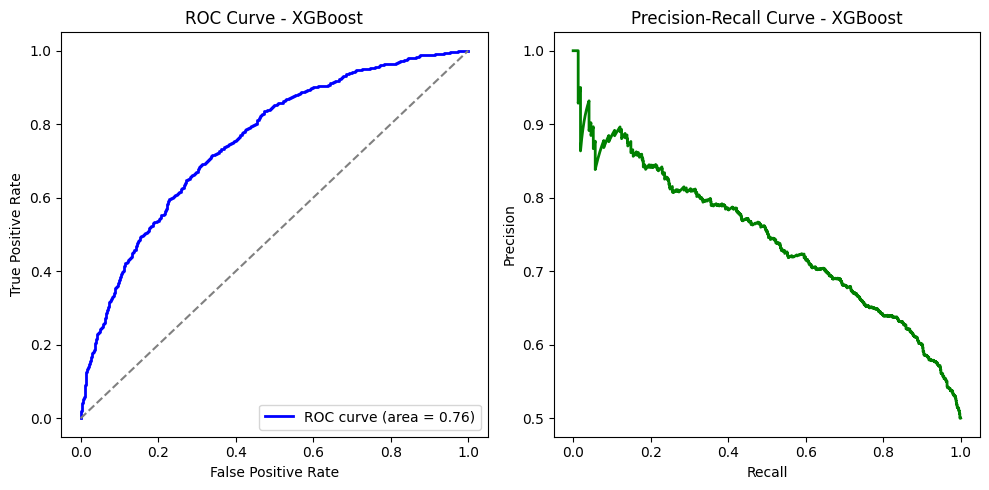

C:\Users\pangwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pangwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pangwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

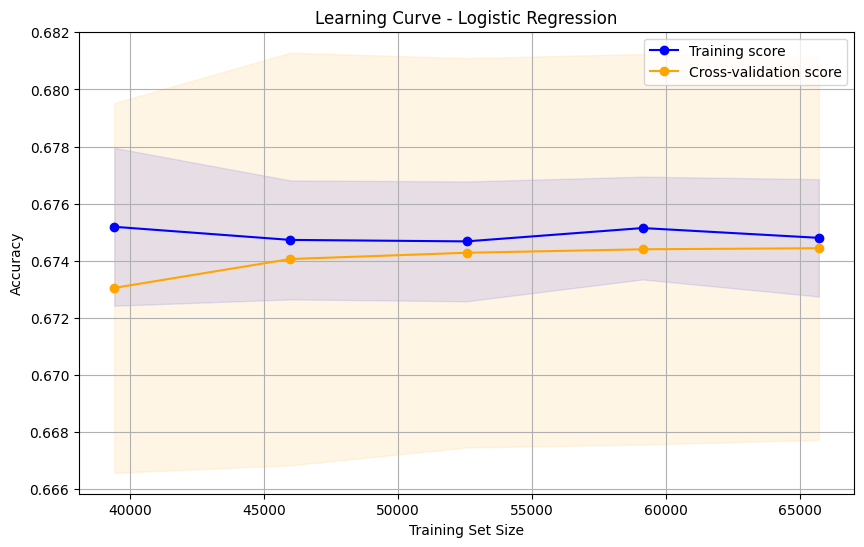

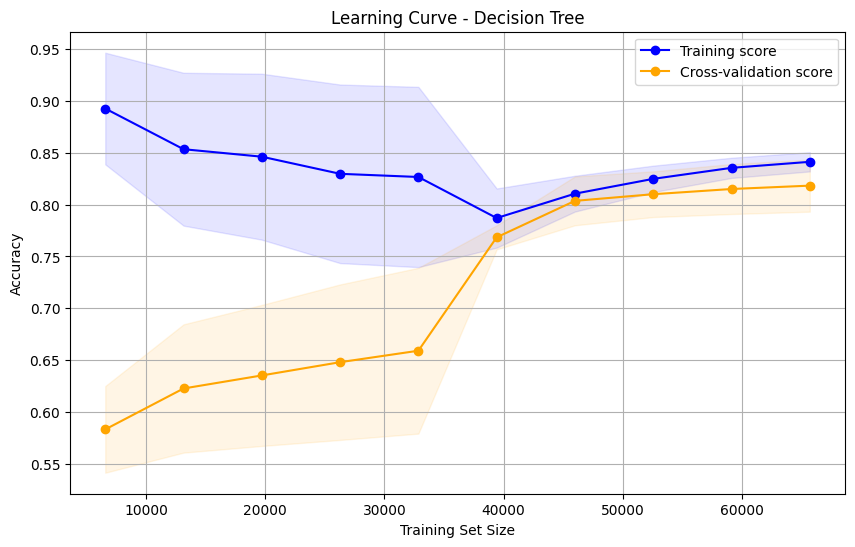

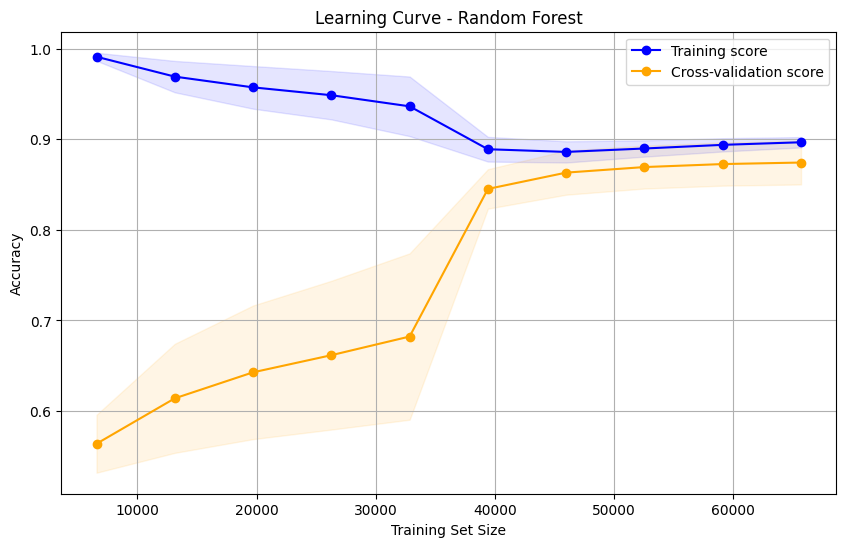

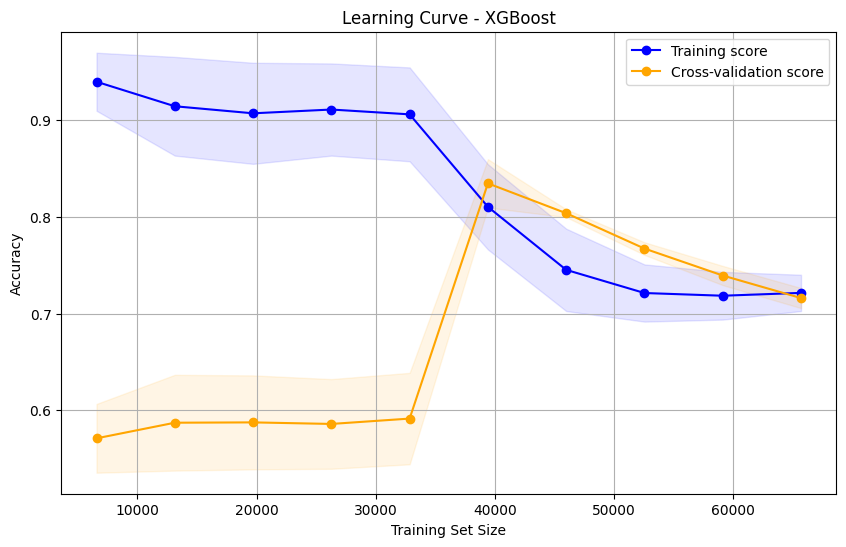

In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE  # SMOTE for oversampling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Load training and testing datasets
train_data = pd.read_csv('full_training.csv')
test_data = pd.read_csv('full_testing.csv')
train_data = train_data.drop(columns=['Unnamed: 0'])
test_data = test_data.drop(columns=['Unnamed: 0'])

# Define features and target
features_train = train_data.drop(columns=['label', 'gender_numeric'])
target_train = train_data['label']
features_test = test_data.drop(columns=['label', 'gender_numeric'])
target_test = test_data['label']

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(features_train)
X_test = scaler.transform(features_test)

# Use SMOTE for oversampling on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, target_train)

from sklearn.metrics import recall_score  # Import recall_score

# Define a function to train, predict, and evaluate models with recall instead of accuracy
def train_evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    print(f"\n--- {model_name} Model ---")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Evaluate the model
    recall = recall_score(y_test, y_pred, average='weighted')  # Calculate recall
    f1 = f1_score(y_test, y_pred, average='weighted')  # Calculate weighted F1
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f"{model_name} Recall (Weighted): {recall:.4f}")
    print(f"{model_name} F1 Score (Weighted): {f1:.4f}")
    print("Confusion Matrix:")
    print(confusion)
    print("\nClassification Report:")
    print(report)

    # Visualize the confusion matrix
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    # ROC Curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    
    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    plt.subplot(1, 2, 2)
    plt.plot(recall, precision, color='green', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    
    plt.tight_layout()
    plt.show()


# Initialize models with adjusted hyperparameters to reduce overfitting
logistic_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)

# Decision Tree with regularization
decision_tree_model = DecisionTreeClassifier(
    max_depth=10,  # Limit depth of the tree
    min_samples_split=10,  # Minimum samples required to split
    min_samples_leaf=5,  # Minimum samples at leaf node
    random_state=42,
    class_weight='balanced'
)

# Random Forest with regularization
random_forest_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features='sqrt',  # Limit the number of features at each split
    random_state=42,
    class_weight='balanced'
)

# XGBoost with regularization and imbalance handling
xgboost_model = XGBClassifier(
    n_estimators=250,             # Reduce number of trees
    max_depth=3,                  # Keep max depth lower
    learning_rate=0.03,           # Increase learning rate slightly
    subsample=0.7,                # 70% of samples per tree
    colsample_bytree=0.7,         # 70% of features per tree
    scale_pos_weight=5,           # Adjust scale_pos_weight for balanced performance
    min_child_weight=5,           # Reduce min_child_weight slightly
    gamma=0.5,                    # Set gamma to limit unnecessary splits
    max_delta_step=1,             # Keep delta step for stability
    eval_metric='logloss',        # Evaluation metric
    random_state=42
)

# Train and evaluate each model
train_evaluate_model(logistic_model, "Logistic Regression", X_train_balanced, y_train_balanced, X_test, target_test)
train_evaluate_model(decision_tree_model, "Decision Tree", X_train_balanced, y_train_balanced, X_test, target_test)
train_evaluate_model(random_forest_model, "Random Forest", X_train_balanced, y_train_balanced, X_test, target_test)
train_evaluate_model(xgboost_model, "XGBoost", X_train_balanced, y_train_balanced, X_test, target_test)

# Plot learning curves
from sklearn.model_selection import StratifiedKFold, learning_curve

def plot_learning_curve(estimator, title, X, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy'):
    plt.figure(figsize=(10, 6))
    train_sizes, train_scores, valid_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=np.linspace(0.1, 1.0, 10), scoring=scoring, n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    valid_scores_mean = np.mean(valid_scores, axis=1)
    valid_scores_std = np.std(valid_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training score')
    plt.plot(train_sizes, valid_scores_mean, 'o-', color='orange', label='Cross-validation score')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, valid_scores_mean - valid_scores_std,
                     valid_scores_mean + valid_scores_std, alpha=0.1, color='orange')
    
    plt.title(f'Learning Curve - {title}')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_learning_curve(logistic_model, "Logistic Regression", X_train_balanced, y_train_balanced)
plot_learning_curve(decision_tree_model, "Decision Tree", X_train_balanced, y_train_balanced)
plot_learning_curve(random_forest_model, "Random Forest", X_train_balanced, y_train_balanced)
plot_learning_curve(xgboost_model, "XGBoost", X_train_balanced, y_train_balanced)



--- Adjusted XGBoost Model ---
Adjusted XGBoost Recall (Weighted): 0.6665
Adjusted XGBoost F1 Score (Weighted): 0.6519
Confusion Matrix:
[[462 538]
 [129 871]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.46      0.58      1000
           1       0.62      0.87      0.72      1000

    accuracy                           0.67      2000
   macro avg       0.70      0.67      0.65      2000
weighted avg       0.70      0.67      0.65      2000



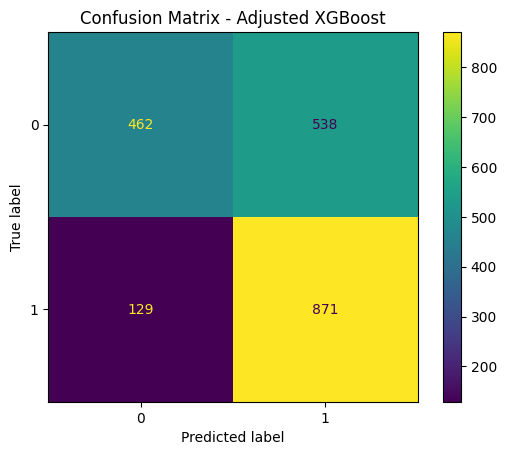

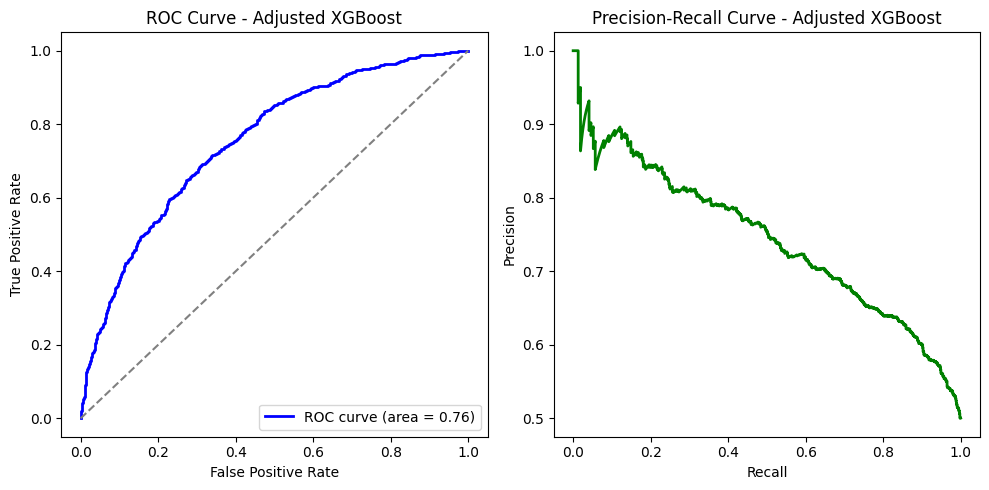

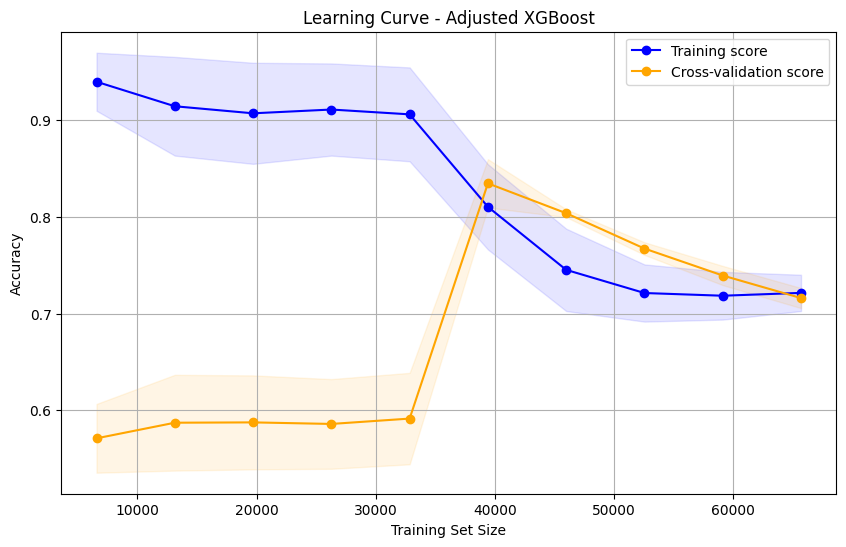

In [33]:
xgboost_model = XGBClassifier(
    n_estimators=250,             # Reduce number of trees
    max_depth=3,                  # Keep max depth lower
    learning_rate=0.03,           # Increase learning rate slightly
    subsample=0.7,                # 70% of samples per tree
    colsample_bytree=0.7,         # 70% of features per tree
    scale_pos_weight=5,           # Adjust scale_pos_weight for balanced performance
    min_child_weight=5,           # Reduce min_child_weight slightly
    gamma=0.5,                    # Set gamma to limit unnecessary splits
    max_delta_step=1,             # Keep delta step for stability
    eval_metric='logloss',        # Evaluation metric
    random_state=42
)

# Train and evaluate the further fine-tuned XGBoost model
train_evaluate_model(xgboost_model, "Adjusted XGBoost", X_train_balanced, y_train_balanced, X_test, target_test)

# Plot learning curve for the adjusted XGBoost model
plot_learning_curve(xgboost_model, "Adjusted XGBoost", X_train_balanced, y_train_balanced)



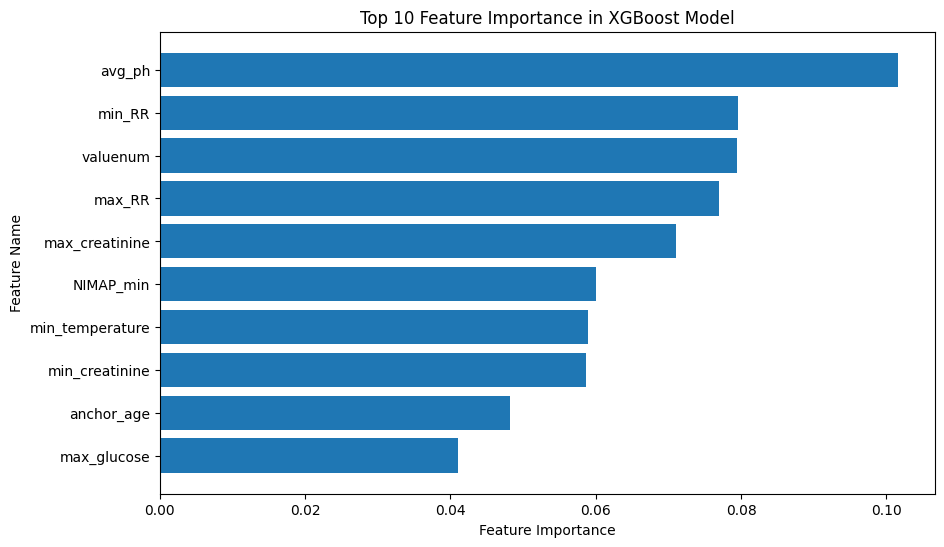

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.46      0.58      1000
           1       0.62      0.87      0.72      1000

    accuracy                           0.67      2000
   macro avg       0.70      0.67      0.65      2000
weighted avg       0.70      0.67      0.65      2000

Accuracy: 0.6665
F1 Score: 0.6519442202780845


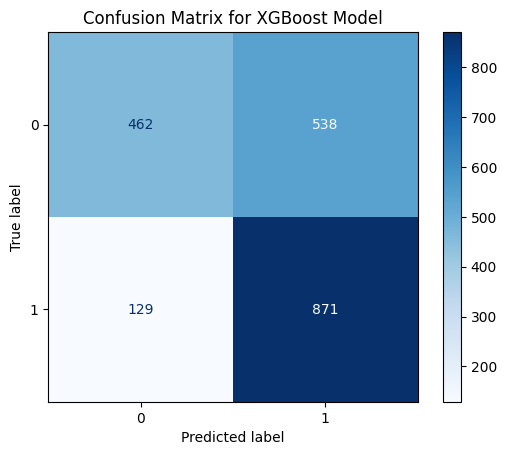

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    f1_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay,
    roc_curve, 
    auc, 
    precision_recall_curve
)
from imblearn.over_sampling import SMOTE  # SMOTE for handling class imbalance
from sklearn.preprocessing import StandardScaler

# Load and clean the training and testing datasets
train_data = pd.read_csv('full_training.csv')
test_data = pd.read_csv('full_testing.csv')
train_data = train_data.drop(columns=['Unnamed: 0'])  # Drop unnecessary index column if present
test_data = test_data.drop(columns=['Unnamed: 0'])

# Define features and target for training and testing sets
features_train = train_data.drop(columns=['label', 'gender_numeric'])
target_train = train_data['label']
features_test = test_data.drop(columns=['label', 'gender_numeric'])
target_test = test_data['label']

# Standardize features for better model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(features_train)
X_test = scaler.transform(features_test)

# Apply SMOTE to handle class imbalance in the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, target_train)

# Define and configure the XGBoost model
xgboost_model = XGBClassifier(
    n_estimators=250,             # Number of trees in the model
    max_depth=3,                  # Maximum depth of each tree
    learning_rate=0.03,           # Learning rate for boosting
    subsample=0.7,                # Percentage of samples per tree
    colsample_bytree=0.7,         # Percentage of features per tree
    scale_pos_weight=5,           # Handle class imbalance
    min_child_weight=5,           # Minimum weight for child nodes
    gamma=0.5,                    # Minimum loss reduction for split
    max_delta_step=1,             # Stabilizes model with imbalanced classes
    eval_metric='logloss',        # Evaluation metric for training
    random_state=42
)

# Train the XGBoost model on the balanced training data
xgboost_model.fit(X_train_balanced, y_train_balanced)

# Extract and sort top 10 feature importances from the trained model
xgboost_importances = xgboost_model.feature_importances_
sorted_indices_xgb = np.argsort(xgboost_importances)[::-1][:10]  # Indices of top 10 features
sorted_feature_names_xgb = np.array(features_train.columns)[sorted_indices_xgb]
sorted_importances_xgb = xgboost_importances[sorted_indices_xgb]

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importances_xgb)), sorted_importances_xgb, align='center')
plt.yticks(range(len(sorted_importances_xgb)), sorted_feature_names_xgb)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Top 10 Feature Importance in XGBoost Model")
plt.gca().invert_yaxis()  # Highest importance feature at the top
plt.show()


y_pred = xgboost_model.predict(X_test)
print("Classification Report:\n", classification_report(target_test, y_pred))
print("Accuracy:", accuracy_score(target_test, y_pred))
print("F1 Score:", f1_score(target_test, y_pred, average='weighted'))


cm = confusion_matrix(target_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()



Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters for XGBoost: {'subsample': 0.8, 'scale_pos_weight': 1, 'n_estimators': 500, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.6}
Best cross-validated F1 Score: 0.9573741411541026

--- Optimized XGBoost Model ---
Optimized XGBoost Accuracy: 0.5365
Optimized XGBoost F1 Score (Weighted): 0.4118
Confusion Matrix:
[[997   3]
 [924  76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68      1000
           1       0.96      0.08      0.14      1000

    accuracy                           0.54      2000
   macro avg       0.74      0.54      0.41      2000
weighted avg       0.74      0.54      0.41      2000



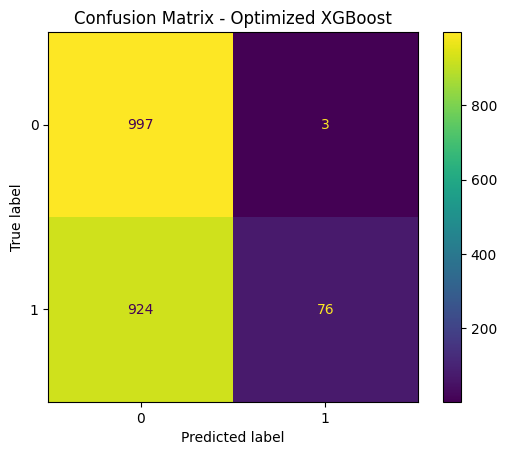

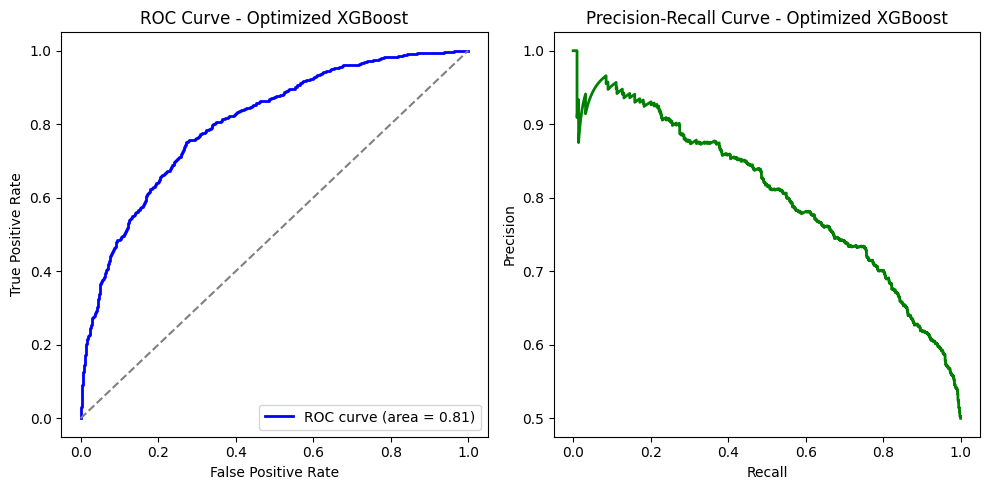

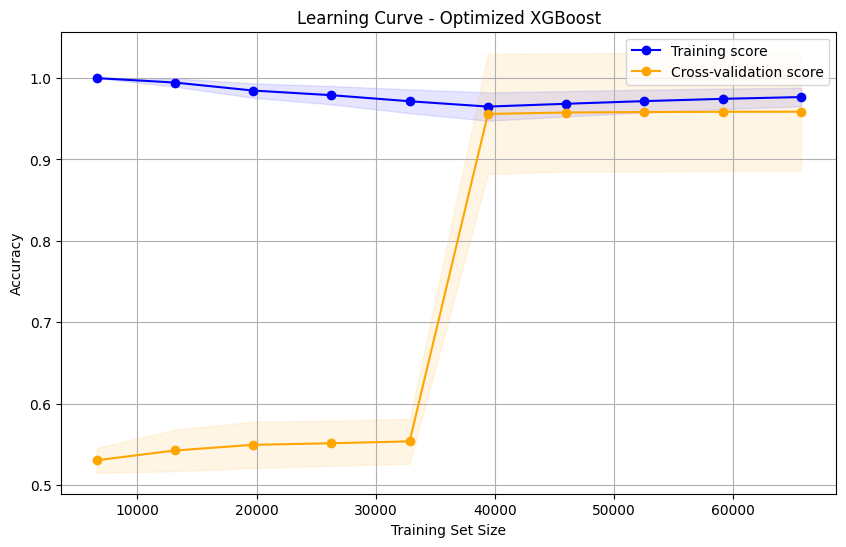

In [25]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define parameter grid for Randomized Search
param_grid = {
    'n_estimators': [100, 300, 500, 700],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'scale_pos_weight': [1, 5, 10, 20],  # Adjust based on class imbalance
    'gamma': [0, 0.1, 0.5, 1]            # Minimum loss reduction for split
}

# Initialize XGBoost model
xgboost_model = XGBClassifier(eval_metric='auc', random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(
    xgboost_model,
    param_distributions=param_grid,
    n_iter=50,  # Number of parameter settings sampled
    scoring='f1_weighted',  # Use F1 score as evaluation metric
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit random search to the training data
random_search.fit(X_train_balanced, y_train_balanced)

# Output best parameters and evaluation results
print("Best parameters for XGBoost:", random_search.best_params_)
print("Best cross-validated F1 Score:", random_search.best_score_)

# Evaluate the best model on the test set
best_xgboost_model = random_search.best_estimator_
train_evaluate_model(best_xgboost_model, "Optimized XGBoost", X_train_balanced, y_train_balanced, X_test, target_test)

# Plot learning curve for the optimized XGBoost model
plot_learning_curve(best_xgboost_model, "Optimized XGBoost", X_train_balanced, y_train_balanced)


In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score

# Load and preprocess training data
train_data = pd.read_csv('full_training.csv')

# Shuffle the data (in case it is ordered by label)
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Define features and target
features = train_data.drop(columns=['label'])
target = train_data['label']

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(features)
y = target

# Use SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X, y)

# Initialize StratifiedKFold with 5 folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define models with optimized parameters
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        min_samples_leaf=1,
        min_samples_split=2,
        class_weight='balanced',
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=10,
        learning_rate=0.1,
        colsample_bytree=0.8,
        scale_pos_weight=1,
        subsample=1.0,
        eval_metric='logloss',
        random_state=42
    )
}

# Define scorers for accuracy and weighted F1
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1_weighted': make_scorer(f1_score, average='weighted')
}

# Run cross-validation for each model and print results
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    
    # Calculate cross-validated scores
    accuracy_scores = cross_val_score(model, X_balanced, y_balanced, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(model, X_balanced, y_balanced, cv=cv, scoring='f1_weighted')
    
    print(f"Cross-validated Accuracy (mean ± std): {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}")
    print(f"Cross-validated F1 Score (weighted, mean ± std): {f1_scores.mean():.4f} ± {f1_scores.std():.4f}")



--- Logistic Regression ---
Cross-validated Accuracy (mean ± std): 0.6742 ± 0.0028
Cross-validated F1 Score (weighted, mean ± std): 0.6742 ± 0.0028

--- Decision Tree ---
Cross-validated Accuracy (mean ± std): 0.9036 ± 0.0030
Cross-validated F1 Score (weighted, mean ± std): 0.9036 ± 0.0030

--- Random Forest ---
Cross-validated Accuracy (mean ± std): 0.9733 ± 0.0021
Cross-validated F1 Score (weighted, mean ± std): 0.9733 ± 0.0021

--- XGBoost ---
Cross-validated Accuracy (mean ± std): 0.9670 ± 0.0017
Cross-validated F1 Score (weighted, mean ± std): 0.9670 ± 0.0017


### Hyperparameter Tuning

In [3]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],         # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'class_weight': ['balanced', None]       # Class weight setting
}

# Perform hyperparameter tuning using GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    cv=5,                   # Use 5-fold cross-validation
    scoring='f1_weighted',  # Use weighted F1 score as the optimization metric
    n_jobs=-1,              # Use all available CPUs
    verbose=2               # Show detailed search process
)

# Fit the grid search on the training data
grid_search_rf.fit(X_train_balanced, y_train_balanced)

# Output the best parameter combination
print("Best parameters for Random Forest:", grid_search_rf.best_params_)

# Retrain the model with the best parameters
best_rf_model = grid_search_rf.best_estimator_

# Evaluate the model on the validation set
y_pred_rf_best = best_rf_model.predict(X_eval)
accuracy_rf_best = accuracy_score(y_eval, y_pred_rf_best)
f1_rf_best = f1_score(y_eval, y_pred_rf_best, average='weighted')
print(f"Optimized Random Forest Accuracy: {accuracy_rf_best:.4f}")
print(f"Optimized Random Forest F1 Score (Weighted): {f1_rf_best:.4f}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Random Forest Accuracy: 0.9006
Optimized Random Forest F1 Score (Weighted): 0.8834


In [4]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],          # Number of weak learners
    'max_depth': [3, 5, 7, 10],               # Maximum depth of the tree
    'learning_rate': [0.01, 0.1, 0.2],        # Learning rate
    'subsample': [0.8, 1.0],                  # Subsampling ratio
    'colsample_bytree': [0.8, 1.0],           # Feature sampling ratio for each tree
    'scale_pos_weight': [1, 2, 5]             # Adjusts weight for the positive class in imbalanced data
}

# Perform hyperparameter tuning for XGBoost using GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,                   # Use 5-fold cross-validation
    scoring='f1_weighted',  # Use weighted F1 score as the optimization metric
    n_jobs=-1,              # Use all available CPUs
    verbose=2               # Show detailed search process
)

# Fit the grid search on the training data
grid_search_xgb.fit(X_train_balanced, y_train_balanced)

# Output the best parameter combination
print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

# Retrain the model with the best parameters
best_xgb_model = grid_search_xgb.best_estimator_

# Evaluate the model on the validation set
y_pred_xgb_best = best_xgb_model.predict(X_eval)
accuracy_xgb_best = accuracy_score(y_eval, y_pred_xgb_best)
f1_xgb_best = f1_score(y_eval, y_pred_xgb_best, average='weighted')
print(f"Optimized XGBoost Accuracy: {accuracy_xgb_best:.4f}")
print(f"Optimized XGBoost F1 Score (Weighted): {f1_xgb_best:.4f}")

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\pangwei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 1.0}
Optimized XGBoost Accuracy: 0.9167
Optimized XGBoost F1 Score (Weighted): 0.8858


### Part 2: SMOTEENN

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.combine import SMOTEENN  # SMOTE + ENN for combined oversampling and cleaning
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Load the dataset
data = pd.read_csv('final_dataset_preprocessed.csv')

# Define features and target
#features = data.drop(columns=['hadm_id', 'stay_id', 'subject_id', 'deathtime', 'label', 'gender', 'intime', 'outtime'])
features = data.drop(columns=['label', 'gender_numeric'])
target = data['label']

# Data split: Training, Validation, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

# Use SMOTE + ENN for oversampling and cleaning
smote_enn = SMOTEENN(random_state=42)
X_train_balanced, y_train_balanced = smote_enn.fit_resample(X_train, y_train)


# Logistic Regression Model
print("\n--- Logistic Regression Model ---")
logistic_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
logistic_model.fit(X_train_balanced, y_train_balanced)
y_pred_logistic = logistic_model.predict(X_eval)

# Evaluate Logistic Regression Model
accuracy_logistic = accuracy_score(y_eval, y_pred_logistic)
f1_logistic = f1_score(y_eval, y_pred_logistic, average='weighted')
confusion_logistic = confusion_matrix(y_eval, y_pred_logistic)
logistic_report = classification_report(y_eval, y_pred_logistic)

print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Logistic Regression F1 Score (Weighted): {f1_logistic:.4f}")
print("Confusion Matrix:")
print(confusion_logistic)
print("\nClassification Report:")
print(logistic_report)

# Decision Tree Model
print("\n--- Decision Tree Model ---")
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = decision_tree_model.predict(X_eval)

# Evaluate Decision Tree Model
accuracy_dt = accuracy_score(y_eval, y_pred_dt)
f1_dt = f1_score(y_eval, y_pred_dt, average='weighted')
confusion_dt = confusion_matrix(y_eval, y_pred_dt)
dt_report = classification_report(y_eval, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree F1 Score (Weighted): {f1_dt:.4f}")
print("Confusion Matrix:")
print(confusion_dt)
print("\nClassification Report:")
print(dt_report)

# Random Forest Model
print("\n--- Random Forest Model ---")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = random_forest_model.predict(X_eval)

# Evaluate Random Forest Model
accuracy_rf = accuracy_score(y_eval, y_pred_rf)
f1_rf = f1_score(y_eval, y_pred_rf, average='weighted')
confusion_rf = confusion_matrix(y_eval, y_pred_rf)
rf_report = classification_report(y_eval, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score (Weighted): {f1_rf:.4f}")
print("Confusion Matrix:")
print(confusion_rf)
print("\nClassification Report:")
print(rf_report)

# XGBoost Model
print("\n--- XGBoost Model ---")
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgboost = xgboost_model.predict(X_eval)

# Evaluate XGBoost Model
accuracy_xgboost = accuracy_score(y_eval, y_pred_xgboost)
f1_xgboost = f1_score(y_eval, y_pred_xgboost, average='weighted')
confusion_xgboost = confusion_matrix(y_eval, y_pred_xgboost)
xgboost_report = classification_report(y_eval, y_pred_xgboost)

print(f"XGBoost Accuracy: {accuracy_xgboost:.4f}")
print(f"XGBoost F1 Score (Weighted): {f1_xgboost:.4f}")
print("Confusion Matrix:")
print(confusion_xgboost)
print("\nClassification Report:")
print(xgboost_report)



--- Logistic Regression Model ---
Logistic Regression Accuracy: 0.6349
Logistic Regression F1 Score (Weighted): 0.7168
Confusion Matrix:
[[3379 2043]
 [ 114  372]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76      5422
           1       0.15      0.77      0.26       486

    accuracy                           0.63      5908
   macro avg       0.56      0.69      0.51      5908
weighted avg       0.90      0.63      0.72      5908


--- Decision Tree Model ---
Decision Tree Accuracy: 0.7612
Decision Tree F1 Score (Weighted): 0.8063
Confusion Matrix:
[[4302 1120]
 [ 291  195]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.79      0.86      5422
           1       0.15      0.40      0.22       486

    accuracy                           0.76      5908
   macro avg       0.54      0.60      0.54      5908
weighted avg       0.87      0.76      0.

### Part3: RandomUnderSampler

In [8]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from imblearn.under_sampling import RandomUnderSampler  # Random Under Sampling for undersampling majority class
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Load the dataset
data = pd.read_csv('final_dataset_preprocessed.csv')

# Define features and target
features = data.drop(columns=['label', 'gender_numeric'])
target = data['label']

# Data split: Training, Validation, and Test sets
X_train, X_temp, y_train, y_temp = train_test_split(features, target, test_size=0.3, random_state=42, stratify=target)
X_eval, X_test, y_eval, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_eval = scaler.transform(X_eval)
X_test = scaler.transform(X_test)

# Use Random Under Sampling to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_train_balanced, y_train_balanced = rus.fit_resample(X_train, y_train)


# Logistic Regression Model
print("\n--- Logistic Regression Model ---")
logistic_model = LogisticRegression(max_iter=10000, class_weight='balanced', random_state=42)
logistic_model.fit(X_train_balanced, y_train_balanced)
y_pred_logistic = logistic_model.predict(X_eval)

# Evaluate Logistic Regression Model
accuracy_logistic = accuracy_score(y_eval, y_pred_logistic)
f1_logistic = f1_score(y_eval, y_pred_logistic, average='weighted')
confusion_logistic = confusion_matrix(y_eval, y_pred_logistic)
logistic_report = classification_report(y_eval, y_pred_logistic)

print(f"Logistic Regression Accuracy: {accuracy_logistic:.4f}")
print(f"Logistic Regression F1 Score (Weighted): {f1_logistic:.4f}")
print("Confusion Matrix:")
print(confusion_logistic)
print("\nClassification Report:")
print(logistic_report)

# Decision Tree Model
print("\n--- Decision Tree Model ---")
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
decision_tree_model.fit(X_train_balanced, y_train_balanced)
y_pred_dt = decision_tree_model.predict(X_eval)

# Evaluate Decision Tree Model
accuracy_dt = accuracy_score(y_eval, y_pred_dt)
f1_dt = f1_score(y_eval, y_pred_dt, average='weighted')
confusion_dt = confusion_matrix(y_eval, y_pred_dt)
dt_report = classification_report(y_eval, y_pred_dt)

print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Decision Tree F1 Score (Weighted): {f1_dt:.4f}")
print("Confusion Matrix:")
print(confusion_dt)
print("\nClassification Report:")
print(dt_report)

# Random Forest Model
print("\n--- Random Forest Model ---")
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
random_forest_model.fit(X_train_balanced, y_train_balanced)
y_pred_rf = random_forest_model.predict(X_eval)

# Evaluate Random Forest Model
accuracy_rf = accuracy_score(y_eval, y_pred_rf)
f1_rf = f1_score(y_eval, y_pred_rf, average='weighted')
confusion_rf = confusion_matrix(y_eval, y_pred_rf)
rf_report = classification_report(y_eval, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print(f"Random Forest F1 Score (Weighted): {f1_rf:.4f}")
print("Confusion Matrix:")
print(confusion_rf)
print("\nClassification Report:")
print(rf_report)

# XGBoost Model
print("\n--- XGBoost Model ---")
xgboost_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgboost_model.fit(X_train_balanced, y_train_balanced)
y_pred_xgboost = xgboost_model.predict(X_eval)

# Evaluate XGBoost Model
accuracy_xgboost = accuracy_score(y_eval, y_pred_xgboost)
f1_xgboost = f1_score(y_eval, y_pred_xgboost, average='weighted')
confusion_xgboost = confusion_matrix(y_eval, y_pred_xgboost)
xgboost_report = classification_report(y_eval, y_pred_xgboost)

print(f"XGBoost Accuracy: {accuracy_xgboost:.4f}")
print(f"XGBoost F1 Score (Weighted): {f1_xgboost:.4f}")
print("Confusion Matrix:")
print(confusion_xgboost)
print("\nClassification Report:")
print(xgboost_report)




--- Logistic Regression Model ---
Logistic Regression Accuracy: 0.6914
Logistic Regression F1 Score (Weighted): 0.7604
Confusion Matrix:
[[3746 1676]
 [ 147  339]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80      5422
           1       0.17      0.70      0.27       486

    accuracy                           0.69      5908
   macro avg       0.57      0.69      0.54      5908
weighted avg       0.90      0.69      0.76      5908


--- Decision Tree Model ---
Decision Tree Accuracy: 0.6141
Decision Tree F1 Score (Weighted): 0.7007
Confusion Matrix:
[[3330 2092]
 [ 188  298]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.61      0.74      5422
           1       0.12      0.61      0.21       486

    accuracy                           0.61      5908
   macro avg       0.54      0.61      0.48      5908
weighted avg       0.88      0.61      0.